# Part I Convolution
In the first part, you are required to implement a function that performs a 2D convolution on an image.

In [1]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import math

Please load example1.jpg.

In [0]:
# if you are using Google Colab, please use the below codes to load image
#from google.colab import files
#from io import BytesIO
#uploaded = files.upload()
#img = Image.open(BytesIO(uploaded['example1.jpg']))

In [2]:
# if you are using local jupyter notebook, please use the below codes to load image
img = Image.open('example1.jpg')

height: 260  width:  460


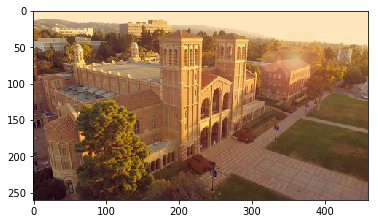

In [3]:
# Show the image
h,w,_ = np.shape(img)
print('height:',h,' width: ',w)
plt.figure()
plt.imshow(img)
plt.show()

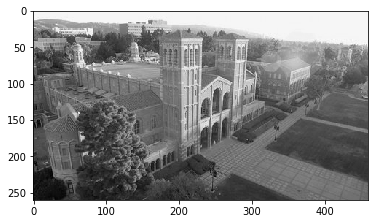

In [5]:
# now convert the RGB image into the gray image for further process
gray_image = np.array(img.convert('L'))
plt.figure()
plt.imshow(gray_image, cmap='gray')
plt.show()

## Question 1
Now you shoud implement your 2d convolution function. 

The output image should have the same shape as the input. 

For border strategy, you will assume that value of the pixels falling outside the input image is 0.

In [94]:
def convolution_2d(image, filter):
    '''
    Take input image and apply filter to it
    '''
    debug = 0
    
    height, width = image.shape
    print('height and width are ', height, width)

    fh,fw = filter.shape
    print('filter height and width are ',fh,fw)
    
    
    #setup the output image
    output_image = np.zeros((height, width))
    
    #padding is to be applied,if needed
    
    
    
    #go through every pixel and apply the filter
    krows = int(np.median(range(0,fh)))
    kcols = int(np.median(range(0,fw)))
    print('krows,kcols  ',krows,kcols)
    
    
    #REMOVE the -2 
    for row in range(2,height-2):
        for col in range(2,width-2):
            #print('at row, col = ',row, col)
            #for every input cell, make that center of it's own kernel sized array
            #becoming a local 0,0
            
            #are we at the edge of the image boundary? if so, use padding
            if(row < krows):
                #pad row on one side
                ptr = krows - row
            if(row > height-krows):
                #pad the upper end with plr number of rows
                plr = row - (height - krows)
            if(col < kcols):
                plc = kcols - col
            if(col > width - kcols):
                prc = col - (width - kcols)
            
            
            
            #for jj in range(0,fh):
            #    for ii in range(0,fw):
            #        #the center pixel here would be the middle of range(0,fh)
            #        pass
            
            #get a section of pixels equal in size to our filter
            
            if(debug == 1):
                print('row-krows ',row-krows)
                print('row+krows ',row+krows)
                print('col - kcols ',col-kcols)
                print('col + kcols ',col + kcols)
            input_area = image[row-krows:row+krows+1, col-kcols:col+kcols+1]
            data = image[0:4,0:4]
            #print(input_area)
            #print(data)
            
            #input_area is a sample of the size of the filter
            y = 0.0
            
            for jj in range(0,fh):
                for ii in range(0,fw):
                    if (debug == 1):
                        print('------------')
                        print('jj,ii = ',jj,ii)
                        print('fh-jj, fw-ii ',fh-jj, fw-ii)
                        print('filter shape is ',filter.shape)
                        print('input_area size is ',input_area.shape)
                    f = filter[fh-1-jj,fw-1-ii]
                    #print('input value is ',input_area[jj,ii])
                    y = y + input_area[jj,ii] #* f #filter[fh-1-jj,fw-1-ii] 
            #pixel value is the sum of y
            output_image[row,col] = y
            #if we are near a border, use our padding
            
            
            
    
    return output

In [30]:
a = range(0,5)
print(a)
b = np.median(a)
print(b)

range(0, 5)
2.0


Now we will check the result after a gaussian filter. If you write the 2d convolution correctly,  you will find the image become vague

In [41]:
gaussian_filter

array([[0.06748446, 0.07646991, 0.0814018 , 0.0814018 , 0.07646991],
       [0.07646991, 0.08665176, 0.09224032, 0.09224032, 0.08665176],
       [0.0814018 , 0.09224032, 0.09818931, 0.09818931, 0.09224032],
       [0.0814018 , 0.09224032, 0.09818931, 0.09818931, 0.09224032],
       [0.07646991, 0.08665176, 0.09224032, 0.09224032, 0.08665176]])

In [ ]:
# Gaussian filter
def get_gaussian(filter_size, sigma):
  # return a gaussian filter with a size of filter_size and parameter sigma
    dim_n = len(filter_size)
    gaussian_weight = np.zeros(shape=filter_size)
    if dim_n == 2:
        dim_x, dim_y = filter_size
        center_x = dim_x/2
        center_y = dim_y/2
        for id_x in range(dim_x):
            for id_y in range(dim_y):
                weight = (id_x-center_x) ** 2 + (id_y-center_y)**2
                gaussian_weight[id_x, id_y] = math.exp(-weight/(2*sigma**2))/(math.sqrt(2*math.pi)*sigma)
    return gaussian_weight

gaussian_filter = get_gaussian([5, 5], 4)
output_gaussian = convolution_2d(gray_image, gaussian_filter)

return
plt.figure()
plt.imshow(output_gaussian, cmap='gray')
plt.show()

height and width are  260 460
filter height and width are  5 5
krows,kcols   2 2


Compare your result with the output from the convolution function provided by scipy. You will get full credit if your output shape is right and the mse error is smaller than 1e-5

In [17]:
from scipy import signal

# check the shape of input and output
shape_check = np.shape(output_gaussian) == np.shape(gray_image)
if shape_check:
  print('The shape of the convolution output is the same as input')
else:
  print('The shape of the convolution output and input do not match, please check your code')
  
# check the mse error
output_standard = signal.convolve2d(gray_image, gaussian_filter, mode='same', boundary='fill', fillvalue=0)
mse = np.mean(((output_standard - output_gaussian)/255)**2)
print('The mse error is:', mse)

NameError: name 'output_gaussian' is not defined

# Bonus
Write a function that can determine whether a square filter provided as input is separable. If the filter is separable, the function returns the two 1D vectors of the decomposed 2D filter, like [vector_h, vecor_v]. If not, the function returns None

Hint: You can use numpy.linalg.matrix_rank() to determine the rank of a matrix.

## Question2: Separate a filter

In [0]:
# the filter is a 2D square matrix
# if the filter is separable, it will return two 1d vectors in a form [vector_h, vector_v]
# if not, it will return None
def separate_filter(filter):
  '''
  Write your own code here
  '''

Now we will check the your code with a random image and a random filter. You will receive full credit if your mse error is less than 1e-5 .

In [0]:
import time

# generate random filter
v = np.random.randint(1, 10, size=[5, 1])
h = np.random.randint(1, 10, size=[1, 5])
random_filter = h*v

# generate a random image
random_image = np.random.randint(0, 255, size=[1000, 1000])

# original_convolution
start_time = time.time()
output_2d = convolution_2d(np.array(random_image), filter)
end_time = time.time()
time_1 = end_time - start_time
print('execution time for 2D convolution is: %.3f s'%(time_1))


# convolution with seperable filters
separate_result = separate_filter(filter)
if not separate_result:
  print('The filter is not separable')
else:
  start_time = time.time()
  filter_h, filter_v = separate_result
  output_1d = convolution_2d(np.array(random_image), filter_h)
  output_1d = convolution_2d(np.array(output_1d), filter_v)
  end_time = time.time()
  time_2 = end_time - start_time
  print('execution time for two 1D convolution is: %.3f s'%(time_2))
  
  # calculate the mse loss beblow, if your loss is less than 1e-3, meaning that the two operations are equal
  err = np.mean(np.power(output_2d - output_1d, 2))
  print('The mse loss for the results is: %.6f' % err)


## Question3: Which method runs faster? Give a brief explanation about your result.

You may write your answer here.